In [1]:
runif(1)

[1] 0.4975654

In [2]:
1 + 1

[1] 2

In [3]:
my_add <- function(a, b){
    return(a + b)
}


In [4]:
my_add(1, 1)

[1] 2

In [5]:
whereis <- function(pattern, word){
    # Describe
    # Inputs
    # Outputs
    return(grep(pattern, word))
}
whereis('I', 'Im lost')

[1] 1

In [ ]:

whereis <- function(pattern, word){
    # Describe
    # Inputs
    # Outputs
    return(grep(pattern, word))
}


In [7]:
?whereis

No documentation for ‘whereis’ in specified packages and libraries:
you could try ‘??whereis’

In [8]:
x <- rep(1, 10)
sum(x)


[1] 10

In [10]:
summ <- 0
for(i in x){
    summ <- summ + i
}
summ

[1] 10

In [12]:
i <- 1
summ <- 0
while(i <= length(x)){
    summ <- summ + x[i]
    i <- i + 1
}
summ

[1] 10

In [13]:
my_sum <- function(x){
    summ <- 0
    for(i in x){
        summ <- summ + i
    }
    return(summ)
}
my_sum(x)

[1] 10

In [14]:
sum(x)
my_sum(x)

[1] 10

[1] 10

In [21]:
x <- rep(1, 1e6)
system.time(sum(x))
system.time(my_sum(x))

   user  system elapsed 
  0.004   0.000   0.005 

   user  system elapsed 
  0.536   0.000   0.536 

In [23]:
typeof(1.0)

[1] "double"

In [24]:
typeof("string")

[1] "character"

In [25]:
typeof(T)

[1] "logical"

In [26]:
my_sum("hello")

ERROR: Error in summ + i: non-numeric argument to binary operator


In [27]:
my_sum(c(T, T))

[1] 2

In [33]:
sample <- function(n, F_inv=function(x) x){
    sam <- runif(n)
    return(F_inv(sam))
}


In [46]:
sample(10)
F_inv_unif <- function(x, a, b){
    return(x*(b - a) + a)
}
F_inv_unif(0.5, 1., 2.)
#sample(5, F_inv=function(x) F_inv_unif(x, 0, 10))
X <- sample(10, F_inv=function(x) F_inv_unif(x, 1.0, 2.0))

[1] 0.205077457 0.741244871 0.897188585 0.135315199 0.982214169 0.587016887
 [7] 0.871467819 0.053414166 0.638725053 0.007547269

[1] 1.5

In [48]:
sample(5)

[1] 0.6502543 0.7968179 0.4440554 0.8187935 0.8319378

In [50]:
sample(n=5)

[1] 0.21292919 0.34955807 0.00663003 0.82888313 0.42230006

In [55]:
sample(F_inv=function(x) F_inv_unif(x, 1.0, 2.0))

ERROR: Error in runif(n): argument "n" is missing, with no default


In [63]:
test <- function(x){
    print(x)
    print(glob1)
    glob1 <- "modified"
    loc <- "Im local"
    print(glob1)
}

glob1 <- "Im global"
test("a variable")
print(glob1)

[1] "a variable"
[1] "Im global"
[1] "modified"
[1] "Im global"


In [68]:
sample <- function(n, F_inv=function(x) x){
    sam <- runif(n)
    return(F_inv(sam))
}

mc_mean <- function(n, F_inv=function(x) x){
    x <- sample(n, F_inv)
    return(sum(x)/n)
}

In [70]:
mc_mean(5)
mc_mean(10)
mc_mean(100)


[1] 0.2984492

[1] 0.3337583

[1] 0.4847088

In [71]:
sims <- function(n_vec, F_inv=function(x) x){
    MCs <- rep(0, length(n_vec))
    i <- 1
    for(n in n_vec){
        MCs[i] <- mc_mean(n, F_inv)
        i <- i + 1
    }
    return(MCs)
}
sims(c(1, 10, 100))

[1] 0.7636134 0.5084966 0.4813812

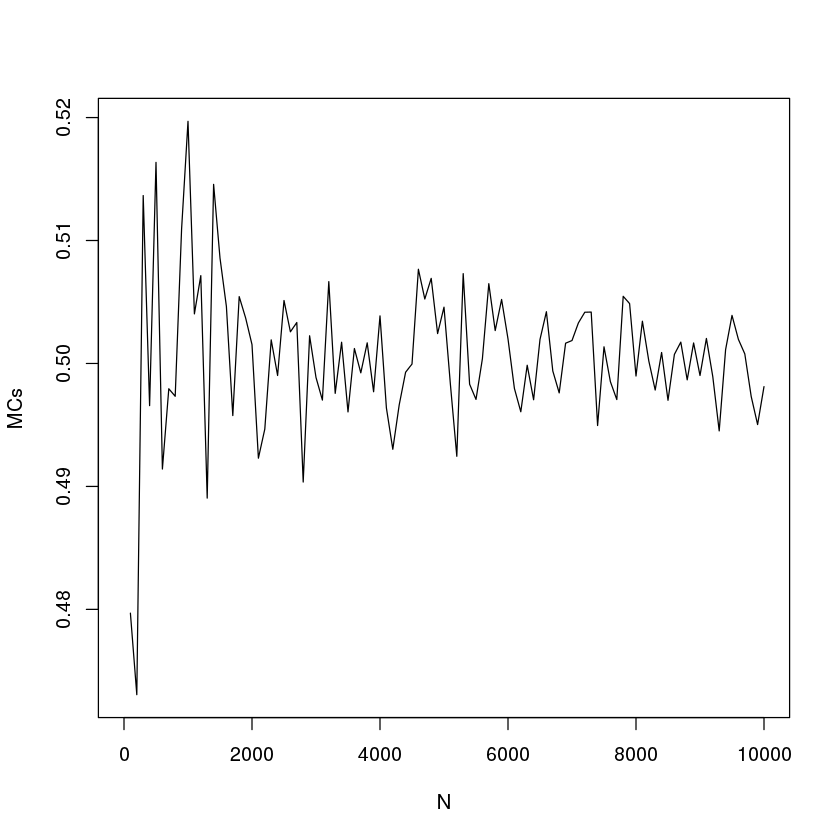

In [73]:
N <- seq(0, 10000, 100)
MCs <- sims(N)
plot(N, MCs, "l")